In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("Churn Modeling.csv")


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [22]:
df.drop(columns = ["RowNumber","CustomerId"	, "Surname"] , inplace = True)

KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df  = pd.get_dummies(df , drop_first = True)

In [29]:
X = df.drop(columns = ["Exited"])
y = df["Exited"]


In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 43)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [34]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
# Initialize the ANN
model = Sequential()

model.add(Dense(3, activation='relu', input_dim=11))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:

history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 0.5955 - accuracy: 0.7144 - val_loss: 0.5584 - val_accuracy: 0.7806
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5268 - accuracy: 0.7916 - val_loss: 0.5093 - val_accuracy: 0.7981
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4902 - accuracy: 0.7962 - val_loss: 0.4806 - val_accuracy: 0.7994
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4688 - accuracy: 0.7962 - val_loss: 0.4638 - val_accuracy: 0.7994
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4554 - accuracy: 0.7962 - val_loss: 0.4528 - val_accuracy: 0.7987
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4463 - accuracy: 0.7969 - val_loss: 0.4446 - val_accuracy: 0.7994
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4394 - accuracy: 0.8048 - val_loss: 0.4381 - val_accuracy: 0.8019

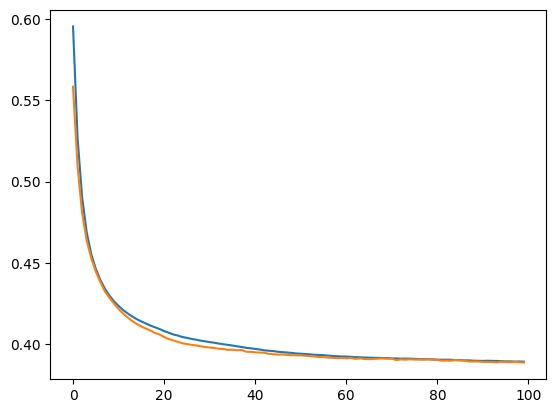

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

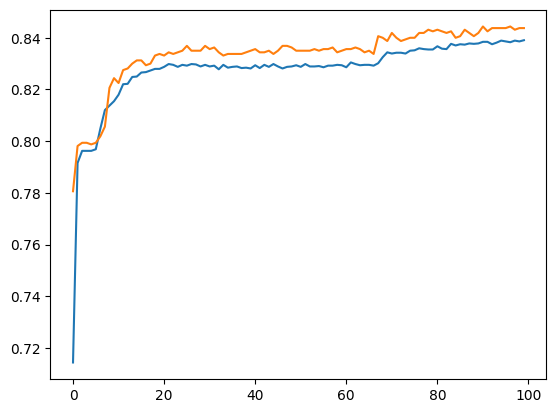

In [41]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])